# II.Models & Evaluation

In [1]:
# %pip install pmdarima #uncomment for install
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pmdarima as pmd
from pmdarima.utils import tsdisplay
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
import statsmodels
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense

from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_parquet("data/train_cleaned")

In [3]:
files=os.listdir('./data')

In [4]:
#checking files to speed up read in process
files

['.ipynb_checkpoints',
 'daily_Binance_Coin',
 'daily_Bitcoin',
 'daily_Bitcoin_Cash',
 'daily_Cardano',
 'daily_Dogecoin',
 'daily_EOS',
 'daily_Ethereum',
 'daily_Ethereum_Classic',
 'daily_IOTA',
 'daily_Litecoin',
 'daily_Maker',
 'daily_Monero',
 'daily_Stellar',
 'daily_TRON',
 'hourly_Binance_Coin',
 'hourly_Bitcoin',
 'hourly_Bitcoin_Cash',
 'hourly_Cardano',
 'hourly_Dogecoin',
 'hourly_EOS',
 'hourly_Ethereum',
 'hourly_Ethereum_Classic',
 'hourly_IOTA',
 'hourly_Litecoin',
 'hourly_Maker',
 'hourly_Monero',
 'hourly_Stellar',
 'hourly_TRON',
 'train_cleaned',
 'weekly_Binance_Coin',
 'weekly_Bitcoin',
 'weekly_Bitcoin_Cash',
 'weekly_Cardano',
 'weekly_Dogecoin',
 'weekly_EOS',
 'weekly_Ethereum',
 'weekly_Ethereum_Classic',
 'weekly_IOTA',
 'weekly_Litecoin',
 'weekly_Maker',
 'weekly_Monero',
 'weekly_Stellar',
 'weekly_TRON']

In [5]:
files=['daily_Binance_Coin',
 'daily_Bitcoin',
 'daily_Bitcoin_Cash',
 'daily_Cardano',
 'daily_Dogecoin',
 'daily_EOS',
 'daily_Ethereum',
 'daily_Ethereum_Classic',
 'daily_Iota',
 'daily_Litecoin',
 'daily_Maker',
 'daily_Monero',
 'daily_Stellar',
 'daily_Tron',
 'hourly_Binance_Coin',
 'hourly_Bitcoin',
 'hourly_Bitcoin_Cash',
 'hourly_Cardano',
 'hourly_Dogecoin',
 'hourly_EOS',
 'hourly_Ethereum',
 'hourly_Ethereum_Classic',
 'hourly_Iota',
 'hourly_Litecoin',
 'hourly_Maker',
 'hourly_Monero',
 'hourly_Stellar',
 'hourly_Tron',
 'weekly_Binance_Coin',
 'weekly_Bitcoin',
 'weekly_Bitcoin_Cash',
 'weekly_Cardano',
 'weekly_Dogecoin',
 'weekly_EOS',
 'weekly_Ethereum',
 'weekly_Ethereum_Classic',
 'weekly_Iota',
 'weekly_Litecoin',
 'weekly_Maker',
 'weekly_Monero',
 'weekly_Stellar',
 'weekly_Tron']

###### printing out read_parquet commands to save time and copy and paste.

In [6]:
#list comp to print out commands
[print(f"pd.read_parquet('./data/{i}')") for i in files]

pd.read_parquet('./data/daily_Binance_Coin')
pd.read_parquet('./data/daily_Bitcoin')
pd.read_parquet('./data/daily_Bitcoin_Cash')
pd.read_parquet('./data/daily_Cardano')
pd.read_parquet('./data/daily_Dogecoin')
pd.read_parquet('./data/daily_EOS')
pd.read_parquet('./data/daily_Ethereum')
pd.read_parquet('./data/daily_Ethereum_Classic')
pd.read_parquet('./data/daily_Iota')
pd.read_parquet('./data/daily_Litecoin')
pd.read_parquet('./data/daily_Maker')
pd.read_parquet('./data/daily_Monero')
pd.read_parquet('./data/daily_Stellar')
pd.read_parquet('./data/daily_Tron')
pd.read_parquet('./data/hourly_Binance_Coin')
pd.read_parquet('./data/hourly_Bitcoin')
pd.read_parquet('./data/hourly_Bitcoin_Cash')
pd.read_parquet('./data/hourly_Cardano')
pd.read_parquet('./data/hourly_Dogecoin')
pd.read_parquet('./data/hourly_EOS')
pd.read_parquet('./data/hourly_Ethereum')
pd.read_parquet('./data/hourly_Ethereum_Classic')
pd.read_parquet('./data/hourly_Iota')
pd.read_parquet('./data/hourly_Litecoin')
pd.rea

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
#very long but all files were read in with the correct order in mind.
daily_Binance_Coin,daily_Bitcoin,daily_Bitcoin_Cash,daily_Cardano,daily_Dogecoin,daily_EOS,daily_Ethereum,daily_Ethereum_Classic,daily_IOTA,daily_Litecoin,daily_Maker,daily_Monero,daily_Stellar,daily_TRON,hourly_Binance_Coin,hourly_Bitcoin,hourly_Bitcoin_Cash,hourly_Cardano,hourly_Dogecoin,hourly_EOS,hourly_Ethereum,hourly_Ethereum_Classic,hourly_IOTA,hourly_Litecoin,hourly_Maker,hourly_Monero,hourly_Stellar,hourly_TRON,weekly_Binance_Coin,weekly_Bitcoin,weekly_Bitcoin_Cash,weekly_Cardano,weekly_Dogecoin,weekly_EOS,weekly_Ethereum,weekly_Ethereum_Classic,weekly_IOTA,weekly_Litecoin,weekly_Maker,weekly_Monero,weekly_Stellar,weekly_TRON=pd.read_parquet('./data/daily_Binance_Coin'),pd.read_parquet('./data/daily_Bitcoin'),pd.read_parquet('./data/daily_Bitcoin_Cash'),pd.read_parquet('./data/daily_Cardano'),pd.read_parquet('./data/daily_Dogecoin'),pd.read_parquet('./data/daily_EOS'),pd.read_parquet('./data/daily_Ethereum'),pd.read_parquet('./data/daily_Ethereum_Classic'),pd.read_parquet('./data/daily_Iota'),pd.read_parquet('./data/daily_Litecoin'),pd.read_parquet('./data/daily_Maker'),pd.read_parquet('./data/daily_Monero'),pd.read_parquet('./data/daily_Stellar'),pd.read_parquet('./data/daily_Tron'),pd.read_parquet('./data/hourly_Binance_Coin'),pd.read_parquet('./data/hourly_Bitcoin'),pd.read_parquet('./data/hourly_Bitcoin_Cash'),pd.read_parquet('./data/hourly_Cardano'),pd.read_parquet('./data/hourly_Dogecoin'),pd.read_parquet('./data/hourly_EOS'),pd.read_parquet('./data/hourly_Ethereum'),pd.read_parquet('./data/hourly_Ethereum_Classic'),pd.read_parquet('./data/hourly_Iota'),pd.read_parquet('./data/hourly_Litecoin'),pd.read_parquet('./data/hourly_Maker'),pd.read_parquet('./data/hourly_Monero'),pd.read_parquet('./data/hourly_Stellar'),pd.read_parquet('./data/hourly_Tron'),pd.read_parquet('./data/weekly_Binance_Coin'),pd.read_parquet('./data/weekly_Bitcoin'),pd.read_parquet('./data/weekly_Bitcoin_Cash'),pd.read_parquet('./data/weekly_Cardano'),pd.read_parquet('./data/weekly_Dogecoin'),pd.read_parquet('./data/weekly_EOS'),pd.read_parquet('./data/weekly_Ethereum'),pd.read_parquet('./data/weekly_Ethereum_Classic'),pd.read_parquet('./data/weekly_Iota'),pd.read_parquet('./data/weekly_Litecoin'),pd.read_parquet('./data/weekly_Maker'),pd.read_parquet('./data/weekly_Monero'),pd.read_parquet('./data/weekly_Stellar'),pd.read_parquet('./data/weekly_Tron')

In [8]:
# manually tts all df's and then baseline model with seasonality then testing RMSE

### Only weekly Sarima models were able to actually function. Here are some results

The baseline RMSE is 363
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=4.59 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=696.077, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=697.703, Time=0.57 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=697.939, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=694.365, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=697.420, Time=0.52 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=697.399, Time=0.50 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=696.294, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=696.583, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=696.692, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[52]          
Total fit time: 8.216 seconds
The model RMSE is 349.0


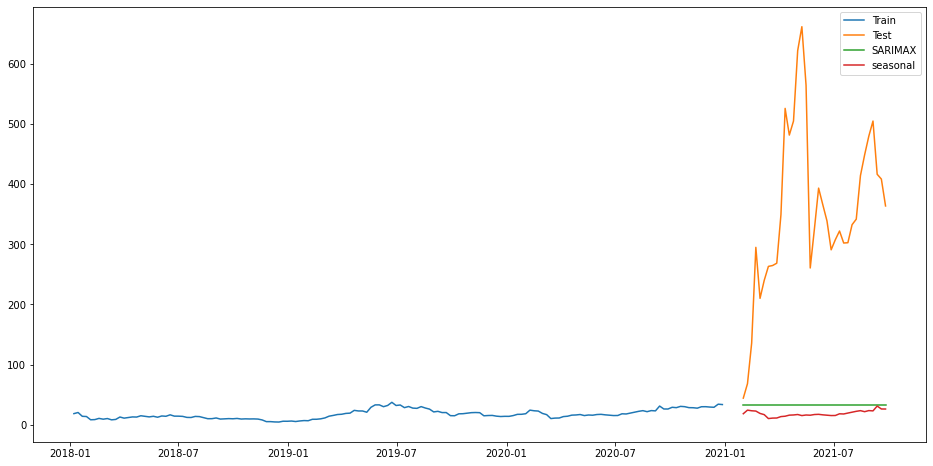

In [9]:
w_binance_coin = weekly_Binance_Coin.groupby(weekly_Binance_Coin.index)[['Close']].last()
train = w_binance_coin .loc[:'2021-01-01']
test = w_binance_coin .loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax']=preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

The baseline RMSE is 37794
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[52]             : AIC=inf, Time=4.19 sec
 ARIMA(0,2,0)(0,0,0)[52]             : AIC=2641.012, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[52]             : AIC=2601.306, Time=0.32 sec
 ARIMA(0,2,1)(0,0,1)[52]             : AIC=2567.783, Time=0.88 sec
 ARIMA(0,2,1)(0,0,0)[52]             : AIC=2565.826, Time=0.03 sec
 ARIMA(0,2,1)(1,0,0)[52]             : AIC=2567.784, Time=1.00 sec
 ARIMA(0,2,1)(1,0,1)[52]             : AIC=inf, Time=1.31 sec
 ARIMA(1,2,1)(0,0,0)[52]             : AIC=2564.168, Time=0.08 sec
 ARIMA(1,2,1)(1,0,0)[52]             : AIC=2566.113, Time=1.63 sec
 ARIMA(1,2,1)(0,0,1)[52]             : AIC=2566.110, Time=1.54 sec
 ARIMA(1,2,1)(1,0,1)[52]             : AIC=inf, Time=2.90 sec
 ARIMA(1,2,0)(0,0,0)[52]             : AIC=2599.227, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[52]             : AIC=2566.140, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[52]             : AIC=2565.707, Time=0.13 sec
 ARIMA(

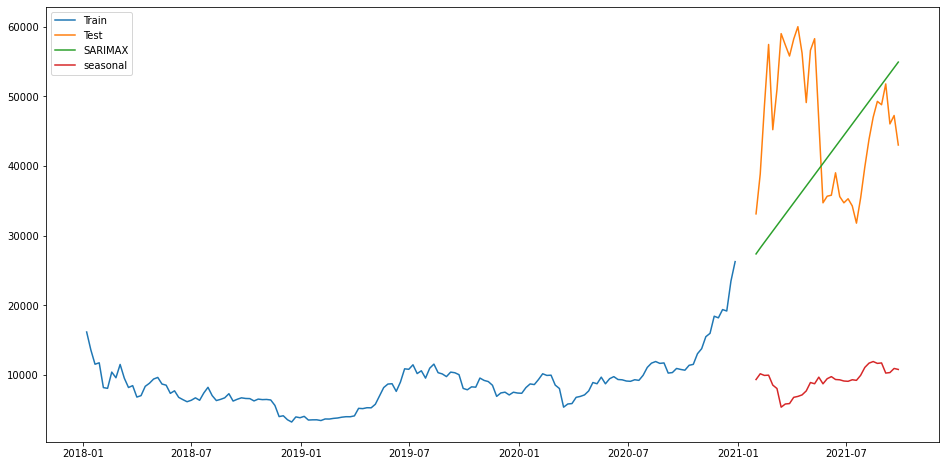

In [10]:
w_bitcoin = weekly_Bitcoin.groupby(weekly_Bitcoin.index)[['Close']].last()
train = w_bitcoin .loc[:'2021-01-01']
test = w_bitcoin .loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

The baseline RMSE is 442
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=4.68 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=1927.103, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=1930.839, Time=0.66 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=1930.864, Time=1.69 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=1927.243, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=1928.983, Time=0.66 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=1928.967, Time=0.51 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=1928.934, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=1928.985, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=1929.444, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[52] intercept
Total fit time: 10.128 seconds
The model RMSE is 613.0


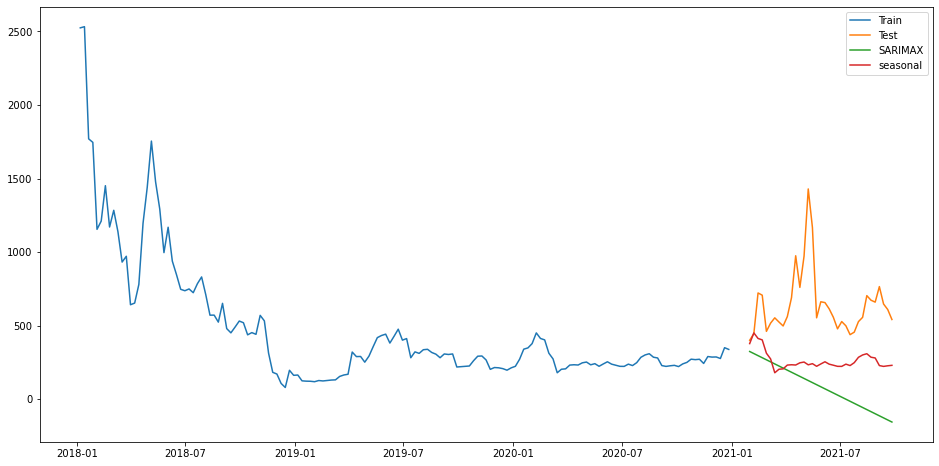

In [11]:
w_bitcoin_cash = weekly_Bitcoin_Cash.groupby(weekly_Bitcoin_Cash.index)[['Close']].last()
train = w_bitcoin_cash.loc[:'2021-01-01']
test = w_bitcoin_cash .loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

The baseline RMSE is 2
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[52]             : AIC=-725.969, Time=2.71 sec
 ARIMA(0,2,0)(0,0,0)[52]             : AIC=-665.183, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[52]             : AIC=-706.701, Time=2.36 sec
 ARIMA(0,2,1)(0,0,1)[52]             : AIC=-740.383, Time=2.86 sec
 ARIMA(0,2,1)(0,0,0)[52]             : AIC=-742.919, Time=0.16 sec
 ARIMA(0,2,1)(1,0,0)[52]             : AIC=-740.412, Time=1.66 sec
 ARIMA(0,2,1)(1,0,1)[52]             : AIC=-738.295, Time=1.65 sec
 ARIMA(1,2,1)(0,0,0)[52]             : AIC=-736.394, Time=0.21 sec
 ARIMA(0,2,2)(0,0,0)[52]             : AIC=-740.296, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[52]             : AIC=-708.282, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[52]             : AIC=-738.972, Time=0.30 sec
 ARIMA(0,2,1)(0,0,0)[52] intercept   : AIC=-743.996, Time=0.16 sec
 ARIMA(0,2,1)(1,0,0)[52] intercept   : AIC=-731.810, Time=3.60 sec
 ARIMA(0,2,1)(0,0,1)[52] intercept   : AIC=-729.118, Time=2.91 

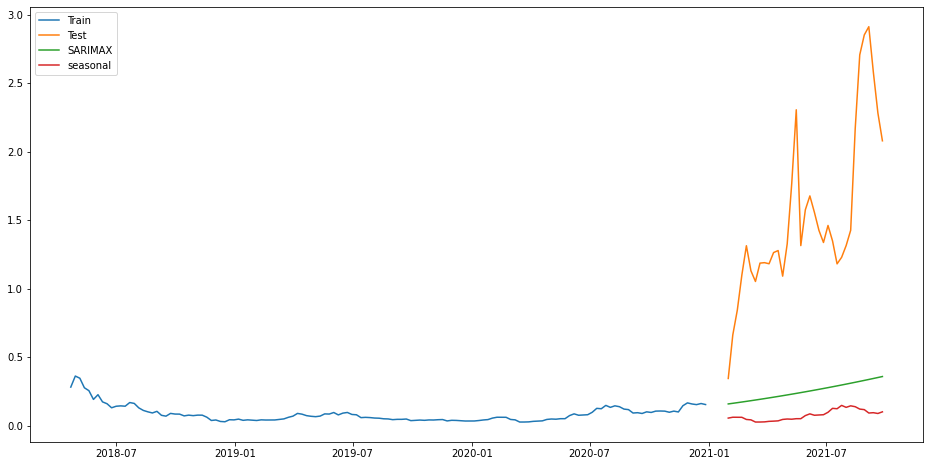

In [12]:
w_cardano = weekly_Cardano.groupby(weekly_Cardano.index)[['Close']].last()
train = w_cardano.loc[:'2021-01-01']
test = w_cardano.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

In [13]:
#price too low to work with this dropping
# w_dogecoin = weekly_Dogecoin.groupby(weekly_Dogecoin.index)[['Close']].last()
# train = w_cardano.loc[:'2021-01-01']
# test = w_cardano.loc['2021-01-31':]
# df_predictions = test.copy(deep=True)
# df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
# round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))

The baseline RMSE is 3
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=4.52 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=528.628, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=532.330, Time=0.70 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=532.340, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=526.833, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=530.470, Time=0.48 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=530.477, Time=0.51 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=532.452, Time=1.22 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=530.516, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=530.517, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[52]          
Total fit time: 8.340 seconds
The model RMSE is 3.0


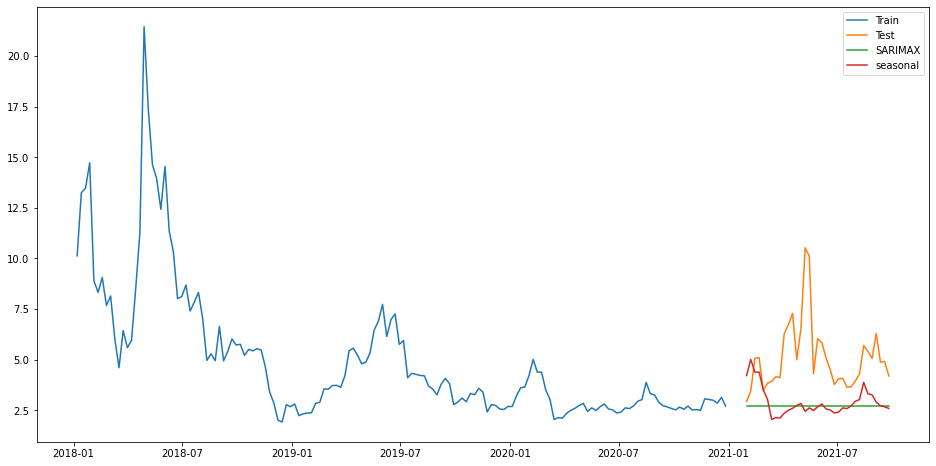

In [14]:
w_eos = weekly_EOS.groupby(weekly_EOS.index)[['Close']].last()
train = w_eos.loc[:'2021-01-01']
test = w_eos.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

The baseline RMSE is 2294
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[52]             : AIC=inf, Time=4.89 sec
 ARIMA(0,2,0)(0,0,0)[52]             : AIC=1860.452, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[52]             : AIC=1739.302, Time=0.51 sec
 ARIMA(0,2,1)(0,0,1)[52]             : AIC=1731.745, Time=0.83 sec
 ARIMA(0,2,1)(0,0,0)[52]             : AIC=1729.844, Time=0.03 sec
 ARIMA(0,2,1)(1,0,0)[52]             : AIC=1731.726, Time=1.10 sec
 ARIMA(0,2,1)(1,0,1)[52]             : AIC=inf, Time=2.76 sec
 ARIMA(1,2,1)(0,0,0)[52]             : AIC=1715.252, Time=0.05 sec
 ARIMA(1,2,1)(1,0,0)[52]             : AIC=1716.941, Time=1.33 sec
 ARIMA(1,2,1)(0,0,1)[52]             : AIC=1717.006, Time=1.36 sec
 ARIMA(1,2,1)(1,0,1)[52]             : AIC=inf, Time=2.92 sec
 ARIMA(1,2,0)(0,0,0)[52]             : AIC=1737.557, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[52]             : AIC=1703.364, Time=0.08 sec
 ARIMA(2,2,1)(1,0,0)[52]             : AIC=1705.102, Time=1.94 sec
 ARIMA(2

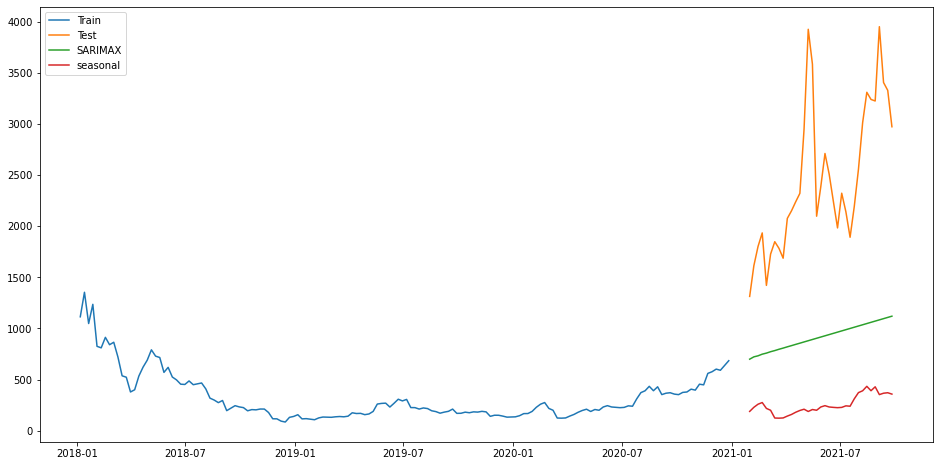

In [15]:
w_ethereum = weekly_Ethereum.groupby(weekly_Ethereum.index)[['Close']].last()
train = w_ethereum.loc[:'2021-01-01']
test = w_ethereum.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

The baseline RMSE is 46
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=4.45 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=701.197, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=703.632, Time=0.67 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=703.694, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=700.255, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=703.191, Time=0.48 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=703.189, Time=0.46 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=2.02 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=701.677, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=701.751, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=700.654, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[52]          
Total fit time: 9.022 seconds
The model RMSE is 46.0


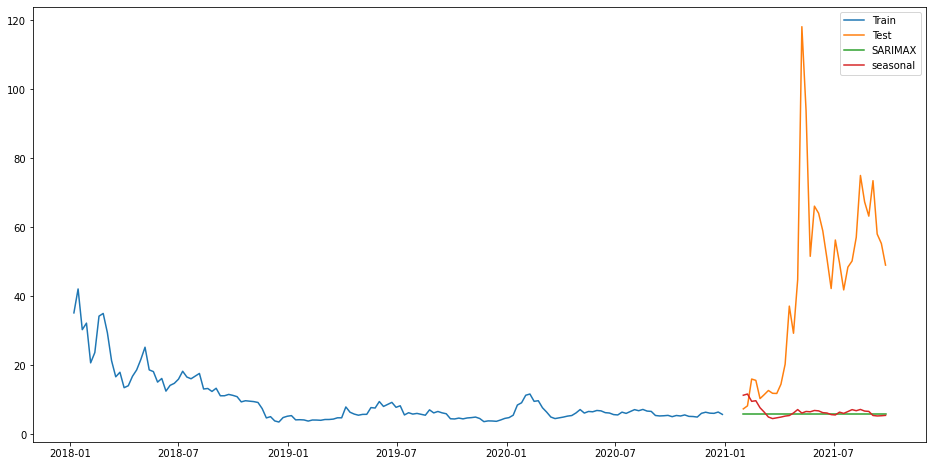

In [16]:
w_ethereum_classic = weekly_Ethereum_Classic.groupby(weekly_Ethereum_Classic.index)[['Close']].last()
train = w_ethereum_classic.loc[:'2021-01-01']
test = w_ethereum_classic.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

The baseline RMSE is 1
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[52]             : AIC=-285.911, Time=4.05 sec
 ARIMA(0,2,0)(0,0,0)[52]             : AIC=-177.818, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[52]             : AIC=-243.616, Time=0.62 sec
 ARIMA(0,2,1)(0,0,1)[52]             : AIC=-285.985, Time=0.92 sec
 ARIMA(0,2,1)(0,0,0)[52]             : AIC=-287.252, Time=0.05 sec
 ARIMA(0,2,1)(1,0,0)[52]             : AIC=-285.957, Time=1.46 sec
 ARIMA(0,2,1)(1,0,1)[52]             : AIC=-283.989, Time=1.55 sec
 ARIMA(1,2,1)(0,0,0)[52]             : AIC=-293.645, Time=0.07 sec
 ARIMA(1,2,1)(1,0,0)[52]             : AIC=-291.682, Time=1.16 sec
 ARIMA(1,2,1)(0,0,1)[52]             : AIC=-291.689, Time=1.26 sec
 ARIMA(1,2,1)(1,0,1)[52]             : AIC=inf, Time=2.92 sec
 ARIMA(1,2,0)(0,0,0)[52]             : AIC=-245.194, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[52]             : AIC=-291.864, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[52]             : AIC=-291.205, Time=0.08 sec
 

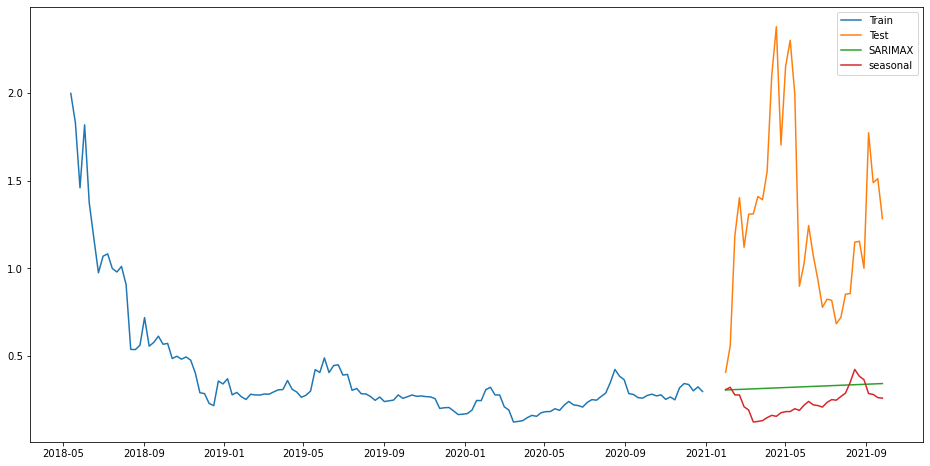

In [17]:
w_iota = weekly_IOTA.groupby(weekly_IOTA.index)[['Close']].last()
train = w_iota.loc[:'2021-01-01']
test = w_iota.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

The baseline RMSE is 151
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[52]             : AIC=1238.831, Time=4.24 sec
 ARIMA(0,2,0)(0,0,0)[52]             : AIC=1315.024, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[52]             : AIC=1267.304, Time=0.37 sec
 ARIMA(0,2,1)(0,0,1)[52]             : AIC=1231.879, Time=0.61 sec
 ARIMA(0,2,1)(0,0,0)[52]             : AIC=1230.954, Time=0.02 sec
 ARIMA(0,2,1)(1,0,0)[52]             : AIC=1231.888, Time=0.57 sec
 ARIMA(0,2,1)(1,0,1)[52]             : AIC=1233.878, Time=0.82 sec
 ARIMA(1,2,1)(0,0,0)[52]             : AIC=1232.388, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[52]             : AIC=1232.465, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[52]             : AIC=1267.430, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[52]             : AIC=1234.216, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[52] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,2,1)(0,0,0)[52]          
Total fit time: 6.979 seconds
The model RMSE is 70.0


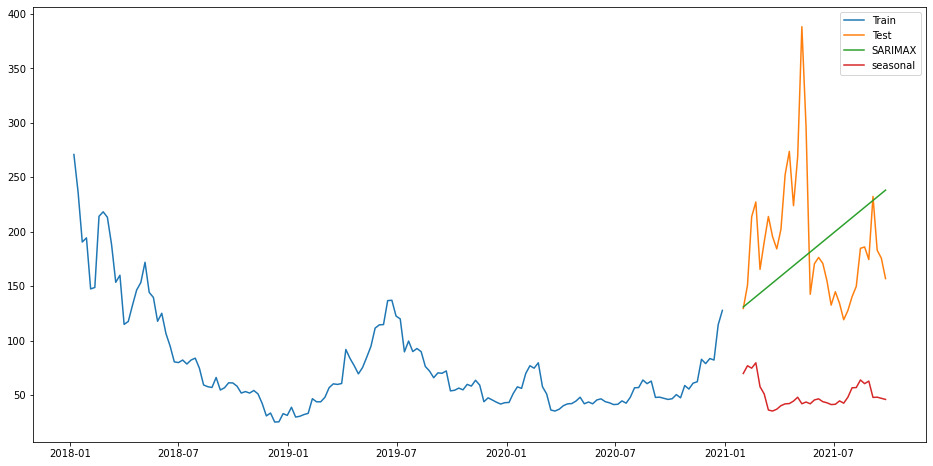

In [18]:
w_litecoin = weekly_Litecoin.groupby(weekly_Litecoin.index)[['Close']].last()
train = w_litecoin.loc[:'2021-01-01']
test = w_litecoin.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

The baseline RMSE is 2616
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=4.34 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1730.586, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=1560.367, Time=1.92 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=1633.743, Time=1.23 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2137.954, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=1558.371, Time=0.05 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=1560.367, Time=1.28 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=1562.366, Time=1.67 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=1559.234, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=1559.445, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[52] intercept   : AIC=1631.744, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[52]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[52] intercept
Total fit time: 10.974 seco

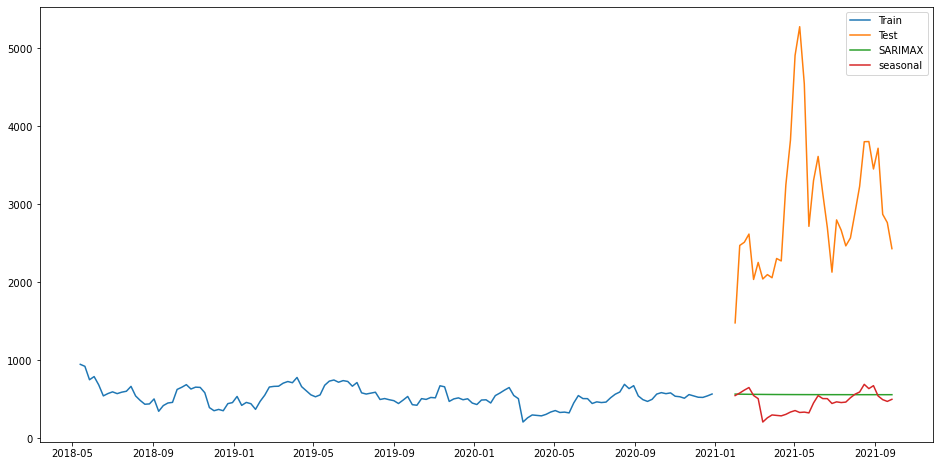

In [19]:
w_maker = weekly_Maker.groupby(weekly_Maker.index)[['Close']].last()
train = w_maker.loc[:'2021-01-01']
test = w_maker.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

In [ ]:
w_monero = weekly_Monero.groupby(weekly_Monero.index)[['Close']].last()
train = w_monero.loc[:'2021-01-01']
test =w_monero.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

The baseline RMSE is 206
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[52]             : AIC=inf, Time=3.82 sec
 ARIMA(0,2,0)(0,0,0)[52]             : AIC=1474.805, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[52]             : AIC=1428.567, Time=0.42 sec
 ARIMA(0,2,1)(0,0,1)[52]             : AIC=1372.822, Time=0.63 sec
 ARIMA(0,2,1)(0,0,0)[52]             : AIC=1370.823, Time=0.02 sec
 ARIMA(0,2,1)(1,0,0)[52]             : AIC=1372.822, Time=0.62 sec
 ARIMA(0,2,1)(1,0,1)[52]             : AIC=inf, Time=1.93 sec
 ARIMA(1,2,1)(0,0,0)[52]             : AIC=1372.603, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[52]             : AIC=1372.608, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[52]             : AIC=1426.577, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[52]             : AIC=1367.134, Time=0.13 sec
 ARIMA(1,2,2)(1,0,0)[52]             : AIC=1369.134, Time=2.85 sec
 ARIMA(1,2,2)(0,0,1)[52]             : AIC=1369.134, Time=2.70 sec
 ARIMA(1,2,2)(1,0,1)[52]             : AIC=inf, Time=4.79 sec
 ARIMA(2,

In [ ]:
#Stellar price below 1 does not work for this model
w_stellar = weekly_Stellar.groupby(weekly_Stellar.index)[['Close']].last()
train = w_stellar.loc[:'2021-01-01']
test =w_stellar.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=52, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(df_predictions['sarimax'], label='SARIMAX')
plt.plot(df_predictions['seasonal'], label='seasonal')
plt.legend(loc='best');

# III.Conclusion
After running many models with different parameters I was able to find some that worked better than others on predicting price. The SARIMA models only were able to run with the weekly timeframe. Hourly and daily time frames were incredibly sluggish and could not even make 1 iteration of the model for over and hour. The best model out of all of the cryptocurrencies was the weekly Cardano closing price data, which had a baseline RMSE of 2.0, beaten by the model with a 1.0. Seasonality in crypto is incredibly rare, given how volatile the markets are. The results were not conclusive of seasonal patterns in the cryptocurrency market and it will always have unpredictability. 

In [ ]:
#tron price too low as well here dropping it 
w_tron = weekly_TRON.groupby(weekly_TRON.index)[['Close']].last()
train = w_tron .loc[:'2021-01-01']
test =w_tron .loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(52, freq='infer') 
round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))

In [ ]:
#adapted from lesson notes
d_binance_coin = daily_Binance_Coin.groupby(daily_Binance_Coin.index)[['Close']].last()
train = d_binance_coin.loc[:'2021-01-01']
test = d_binance_coin.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=365, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')


In [ ]:
d_bitcoin = daily_Bitcoin.groupby(daily_Bitcoin.index)[['Close']].last()
train = d_bitcoin.loc[:'2021-01-01']
test = d_bitcoin.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=365, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
d_bitcoin_cash = daily_Bitcoin_Cash.groupby(daily_Bitcoin_Cash.index)[['Close']].last()
train = d_bitcoin_cash.loc[:'2021-01-01']
test = d_bitcoin_cash.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=365, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
d_cardano = daily_Cardano.groupby(daily_Cardano.index)[['Close']].last()
train = d_cardano.loc[:'2021-01-01']
test = d_cardano.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=365, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
#Dogecoin less than $1 and doesn't get picked up by model dropping dogecoin
d_dogecoin=daily_Dogecoin.groupby(daily_Dogecoin.index)[['Close']].last()
train = d_dogecoin.loc[:'2021-01-01']
test = d_dogecoin.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))

In [ ]:
d_eos = daily_EOS.groupby(daily_EOS.index)[['Close']].last()
train = d_eos.loc[:'2021-01-01']
test = d_eos.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=365, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
d_ethereum = daily_Ethereum.groupby(daily_Ethereum.index)[['Close']].last()
train = d_ethereum.loc[:'2021-01-01']
test = d_ethereum.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=365, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
d_ethereum_classic = daily_Ethereum_Classic.groupby(daily_Ethereum_Classic.index)[['Close']].last()
train = d_ethereum_classic.loc[:'2021-01-01']
test = d_ethereum_classic.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=365, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
d_iota = daily_IOTA.groupby(daily_IOTA.index)[['Close']].last()
train = d_iota.loc[:'2021-01-01']
test = d_iota.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=365, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
d_litecoin = daily_Litecoin.groupby(daily_Litecoin.index)[['Close']].last()
train = d_litecoin.loc[:'2021-01-01']
test = d_litecoin.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=365, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
#maker was dropped because it has NaNs that cannot be dropped due to the indexing
#daily_Maker.dropna(inplace=True)

In [ ]:
#d_maker = daily_Maker.groupby(daily_Maker.index)[['Close']].last()
#train = d_maker.loc[:'2021-01-01']
#test = d_maker.loc['2021-01-31':]
#df_predictions = test.copy(deep=True)
#df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
#round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))

In [ ]:
d_monero = daily_Monero.groupby(daily_Monero.index)[['Close']].last()
train = d_monero .loc[:'2021-01-01']
test = d_monero .loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=365, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
#Stellar less than $1 and doesn't get picked up by model dropping Stellar
d_stellar = daily_Stellar.groupby(daily_Stellar.index)[['Close']].last()
train = d_stellar.loc[:'2021-01-01']
test = d_stellar.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))

In [ ]:
#TRON less than $1 and doesn't get picked up by model dropping TRON
d_tron = daily_TRON.groupby(daily_TRON.index)[['Close']].last()
train = d_tron.loc[:'2021-01-01']
test = d_tron.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(365, freq='infer') 
round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))

In [ ]:
h_binance_coin = hourly_Binance_Coin.groupby(hourly_Binance_Coin.index)[['Close']].last()
train = h_binance_coin.loc[:'2021-01-01']
test = h_binance_coin.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))

In [ ]:
h_bitcoin = hourly_Bitcoin.groupby(hourly_Bitcoin.index)[['Close']].last()
train = h_bitcoin.loc[:'2021-01-01']
test = h_bitcoin.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=8766,, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
h_bitcoin_cash = hourly_Bitcoin_Cash.groupby(hourly_Bitcoin_Cash.index)[['Close']].last()
train = h_bitcoin_cash.loc[:'2021-01-01']
test = h_bitcoin_cash.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=8766, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
h_cardano = hourly_Cardano.groupby(hourly_Cardano.index)[['Close']].last()
train = h_cardano.loc[:'2021-01-01']
test = h_cardano.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=8766, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
#dropped because below $1 not working with model
h_dogecoin = hourly_Dogecoin.groupby(hourly_Dogecoin.index)[['Close']].last()
train = h_cardano.loc[:'2021-01-01']
test = h_cardano.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=8766, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
h_eos = hourly_EOS.groupby(hourly_EOS.index)[['Close']].last()
train = h_eos.loc[:'2021-01-01']
test = h_eos.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=8766, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
h_ethereum = hourly_Ethereum.groupby(hourly_Ethereum.index)[['Close']].last()
train = h_ethereum.loc[:'2021-01-01']
test = h_ethereum.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=8766, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
h_ethereum_classic = hourly_Ethereum_Classic.groupby(hourly_Ethereum_Classic.index)[['Close']].last()
train = h_ethereum_classic.loc[:'2021-01-01']
test = h_ethereum_classic.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=8766, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
h_iota = hourly_IOTA.groupby(hourly_IOTA.index)[['Close']].last()
train = h_iota.loc[:'2021-01-01']
test = h_iota.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=8766, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
h_litecoin = hourly_Litecoin.groupby(hourly_Litecoin.index)[['Close']].last()
train = h_litecoin.loc[:'2021-01-01']
test = h_litecoin.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=8766, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
#null values cant be dropped for this model. Omitting Maker moving forward
# h_maker = hourly_Maker.groupby(hourly_Maker.index)[['Close']].last()
# train =h_maker .loc[:'2021-01-01']
# test = h_maker .loc['2021-01-31':]
# df_predictions = test.copy(deep=True)
# df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
# round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))

In [ ]:
h_monero = hourly_Monero.groupby(hourly_Monero.index)[['Close']].last()
train = h_monero.loc[:'2021-01-01']
test =h_monero.loc['2021-01-31':]
df_predictions = test.copy(deep=True)
df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
baseline=round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))
print(f'The baseline RMSE is {baseline}')
model = pmd.auto_arima(train['Close'], m=8766, trace=True,random_state=42)
preds = model.predict(n_periods=test.shape[0])
df_predictions['sarimax'] = preds
rmse_sarima = np.round(mean_squared_error(test['Close'], preds, squared=False), 0)
print(f'The model RMSE is {rmse_sarima}')

In [ ]:
#stellar is dropped because price is below 1
# h_stellar = hourly_Stellar.groupby(hourly_Stellar.index)[['Close']].last()
# train = h_stellar.loc[:'2021-01-01']
# test = h_stellar.loc['2021-01-31':]
# df_predictions = test.copy(deep=True)
# df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
# round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))

In [ ]:
#tron is dropped because price is below 1
# h_tron = hourly_TRON.groupby(hourly_TRON.index)[['Close']].last()
# train = h_tron.loc[:'2021-01-01']
# test = h_tron.loc['2021-01-31':]
# df_predictions = test.copy(deep=True)
# df_predictions['seasonal'] = train['Close'].shift(8766, freq='infer') 
# round(mean_squared_error(df_predictions['Close'], df_predictions['seasonal'], squared=False))